Vision Dataset: CIFAR-10- It dataset consists of 60000 32x32 colour images in 10 classes. Deep neural network on the CIFAR-10 dataset.


## 1. Import Libraries/Dataset


1.   Import required libraries
2.   Import the dataset
3.   Check the GPU available











### Import required libraries, write custom functions

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
def plot_learning_progress_loss(history):
    plt.rcParams["figure.figsize"] = (5,5)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Loss vs epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'],loc='upper right')
    plt.show()
def plot_learning_progress_accuracy(history):
    plt.rcParams["figure.figsize"] = (5,5)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy vs epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'],loc='upper left')
    plt.show() 
def display_model_performance(model,x_test,y_test,display_labels):
    predict_prob=model.predict(x_test)
    y_pred = np.argmax(predict_prob, axis=1)
    cm=tf.math.confusion_matrix(np.argmax(y_test,axis=1),y_pred)
    print(cm)
    cm_n = cm.numpy()
    cm_n_norm = cm_n.astype('float') / cm_n.sum(axis=1)[:, np.newaxis]
    plt.rcParams["figure.figsize"] = (7,7)
    ConfusionMatrixDisplay(cm_n_norm,display_labels).plot()   
    print('\nClassification Report\n')
    c_r=classification_report(np.argmax(y_test,axis=1), y_pred, target_names=display_labels)
    print(c_r)

### Import the dataset

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train_orig,y_train_orig),(x_test_orig,y_test_orig) = cifar10.load_data()
cifar10_labels = ['airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck']

170500096/170498071 [==============================] - 13s 0us/step


### Check the GPU available

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2. Data Visualization


1.   Plot at least one sample from each class of the dataset
2.   Print the shapes of train and test data


### Plot at least one sample from each class of the dataset

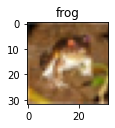

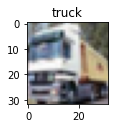

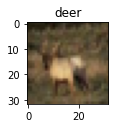

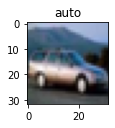

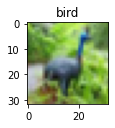

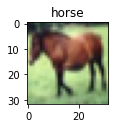

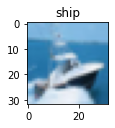

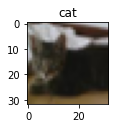

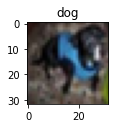

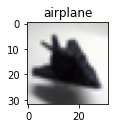

In [5]:
#Step 2 a - sample from each class of the dataset

class_printed ={} #dictionary to keep track of class of dataset printed
training_data_count = y_train_orig.shape[0] # get training count e.g. 50000
YtrainArray= np.array(y_train_orig)
plt.rcParams["figure.figsize"] = (1.5,1.5) # set fig size to reasonable small
for i in range(training_data_count):
  class_label=cifar10_labels[YtrainArray[i][0]]
  if not class_label in class_printed:
    plt.imshow(x_train_orig[i])
    plt.title(class_label) 
    plt.show()
    class_printed[class_label] = 'True' #add to dictionary to keep track of class printed
  
  if len(class_printed) == len(cifar10_labels): 
    break


### Print the shapes of train and test data

In [6]:
print('Train data shape:'+str(x_train_orig.shape))
print('Test data shape:'+str(x_test_orig.shape))

Train data shape:(50000, 32, 32, 3)
Test data shape:(10000, 32, 32, 3)


## 3. Data Pre-processing


1.   Bring the train and test data in the required format



In [7]:
x_train, x_test = x_train_orig / 255.0, x_test_orig / 255.0
# reshaping X data: (n, 32, 32, 3) => (n, 3072)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [8]:
# converting y data into categorical (one-hot encoding)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train_orig)
y_test = to_categorical(y_test_orig)

In [9]:
print('Train data shape:'+str(x_train.shape))
print('Test data shape:'+str(x_test.shape))

Train data shape:(50000, 3072)
Test data shape:(10000, 3072)


# **Model 1**

## 4. Model Building


1.   Sequential Model layer
2.   Add L2 regularization to all the layers
3.   Add one layer of dropout at the appropriate position and give reasons
4.   Choose the appropriate activation function for all the layers
5.   Print the model summary



### Model building
* We tried various number of layers and various neurons in each layer. We found that beyond 4 layers and above 1000 neurons in each layer accuracy is not improving any further.
* Without regularization we were getting huge gap between training and validation accuracy (>20%). Added L2 regularization.
* Added one dropout layer on 2nd hidden layer. We tried applying dropout at input layer and each of the hidden layers. We got 52% accurancy when we applied dropout at input layer. We got 45% accurancy when we applied dropout at 1st hidden layer. We agot 52% accurancy after applying dropout at 2nd hidden layer.
We have usd 50% dropout percentage.
* ReLu is used as activation function for all hidden layers, since ReLu performs better then traditional activation functions such as sigmoid. For final layer softmax is used as activation function since we want categorize output into 10 classes. In model definition we have specified 'linear' as activation function since softmax is automatically applied later when we apply categorical cross entropy loss function where we are specifying logits=True. This is done to improve numerical stability during model training.

In [1]:
def get_regularized_model1(wd,rate):
    model=Sequential([Dense(1000,kernel_regularizer=regularizers.l2(wd),kernel_initializer='he_normal',activation='relu',input_shape=(3072,)),
                  Dense(500,kernel_regularizer=regularizers.l2(wd),kernel_initializer='he_normal',activation='relu'),
                  Dropout(rate),  
                  Dense(300,kernel_regularizer=regularizers.l2(wd),kernel_initializer='he_normal',activation='relu'),
                  Dense(150,kernel_regularizer=regularizers.l2(wd),kernel_initializer='he_normal',activation='relu'),
                  Dense(10,kernel_regularizer=regularizers.l2(wd),kernel_initializer='he_normal',activation='linear')])
    return model

In [10]:
model1 = get_regularized_model1(0.002,0.5)

### Model Summary

In [11]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              3073000   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_3 (Dense)              (None, 150)               45150     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1510      
Total params: 3,770,460
Trainable params: 3,770,460
Non-trainable params: 0
______________________________________________

## 5. Model Compilation


1.   Compile model with appropriate loss function
2.   Use appropriate optimizer
3.   Use accuracy as metric



### Loss function and optimizer
* We have selected CategoricalCrossentropy as loss function since we are dealing with 10 classes and CategoricalCrossentropy helps to optimize learning over multiple classes.
* We have used Gradient descent (with momentum) optimizer: We tried training model with various learning rates. There were lot of fluctuations with 0.05 learning rate. We kept reducing the learning rate and found that 0.01 was optimal at achieving desired accuracy quickly.
We added momentum to 0.9 which helps accelerates gradient descent in the relevant direction and dampens oscillations.
* softmax activation on output layer is automatically applied since we are specifying logits=True
* Accuracy is used as metric

In [12]:
model1.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 6. Model Training


1.   Train the model for an appropriate number of epochs. Use the appropriate batch size.
2.   Plot the loss and accuracy history graphs. Print the total time taken for training.



* We have applied early stopping so that learning stops automatically without completing 100 epochs. We have specified with patience = 5 to check if there is any possiblity of further increase in accuracy.

In [13]:
start_time = time.time()
history1=model1.fit(x_train, y_train, batch_size=1024, epochs=100, validation_data=(x_test, y_test),callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])
end_time = time.time()

Epoch 1/100
49/49 [==============================] - 1s 21ms/step - loss: 9.8577 - accuracy: 0.2132 - val_loss: 9.5062 - val_accuracy: 0.3093
Epoch 2/100
49/49 [==============================] - 1s 16ms/step - loss: 9.3446 - accuracy: 0.3117 - val_loss: 9.0803 - val_accuracy: 0.3738
Epoch 3/100
49/49 [==============================] - 1s 15ms/step - loss: 8.9750 - accuracy: 0.3504 - val_loss: 8.7355 - val_accuracy: 0.3915
Epoch 4/100
49/49 [==============================] - 1s 16ms/step - loss: 8.6469 - accuracy: 0.3728 - val_loss: 8.4173 - val_accuracy: 0.4109
Epoch 5/100
49/49 [==============================] - 1s 16ms/step - loss: 8.3507 - accuracy: 0.3875 - val_loss: 8.1305 - val_accuracy: 0.4199
Epoch 6/100
49/49 [==============================] - 1s 15ms/step - loss: 8.0631 - accuracy: 0.4004 - val_loss: 7.8889 - val_accuracy: 0.4133
Epoch 7/100
49/49 [==============================] - 1s 16ms/step - loss: 7.7972 - accuracy: 0.4125 - val_loss: 7.6014 - val_accuracy: 0.4370
Epoch 


## 7. Model Evaluation

### Model performance, Confusion matrix and classification report

* Model performance: we have plotted training and validation loss and accuracy vs epochs
* Confusion matrix: We have give confusion matrix with counts (Vertical axis index stands for actual classes. Horizontal axis index stands for predicted classes.) as well as normalized confusion matrix with color coding
* Classification report is also provided which gives classwise performance


Easy reference to understand classification report:
* Precision: How much % of identified class  are correct (TP/(TP+FP))
* Recall:How much % of a class are correctly identified (TP/(All positive = TP+FN))
* f1-score: Harmonic mean between precision and recall
* support: Number of occurances of a given class

### Class performance based on Precision, Recall and combination of both:
Precision:
* Best performing: Auto
* Worst performing: Bird


Recall:
* Best performing: Airplane
* Worst performing: Cat


Balance between precision and recall
* Best performing : Auto
* Worst performing : Cat

For Airoplane we have very good recall 76% and decent precision of 46%. We think it could be because there are more straight edges in airplane compared to some other classes which are not performing well. We observe that recall for auto is also good - 60% which also has straight edges. 

Cat was lowest performer overall with only 32% recall. We saw that most of the times model was classifying cat images as either dog or bird. This is probably because of overall shape of these 3 classes are similar. Similarly we see lower score for dog, with frog performing only slightly better.

313/313 - 1s - loss: 1.8414 - accuracy: 0.5176

Test loss: 1.841356873512268

Test accuracy: 0.5175999999046326


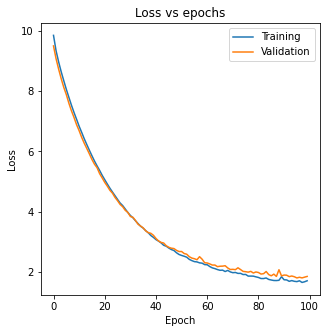

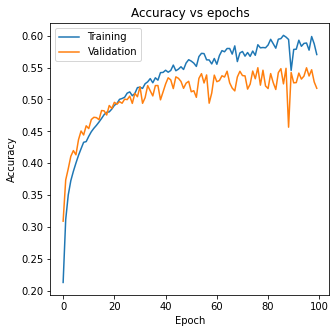

Time taken to train: 81.81406855583191 seconds


In [14]:
test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
plot_learning_progress_loss(history1)
plot_learning_progress_accuracy(history1)
print("Time taken to train: %s seconds" % (end_time - start_time))

tf.Tensor(
[[758  12 102  11  21   3  10  16  51  16]
 [113 601  36  24   8  11  12  22  64 109]
 [119   9 634  42  77  34  29  39   8   9]
 [ 54   4 232 318  77 129  89  52  22  23]
 [ 78   7 328  35 428  21  31  56  13   3]
 [ 36   2 213 185  77 353  40  62  19  13]
 [ 19   9 238  70 136  26 458  21  11  12]
 [ 75   5 128  46 100  46   9 557  10  24]
 [279  38  31  26  25  13   0  11 545  32]
 [129 136  43  34  16  12  16  40  50 524]], shape=(10, 10), dtype=int32)

Classification Report

              precision    recall  f1-score   support

    airplane       0.46      0.76      0.57      1000
        auto       0.73      0.60      0.66      1000
        bird       0.32      0.63      0.42      1000
         cat       0.40      0.32      0.36      1000
        deer       0.44      0.43      0.44      1000
         dog       0.54      0.35      0.43      1000
        frog       0.66      0.46      0.54      1000
       horse       0.64      0.56      0.59      1000
        ship     

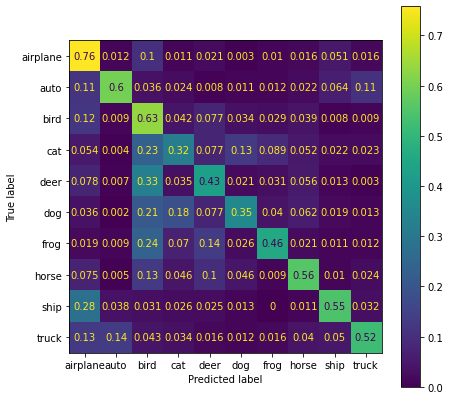

In [15]:
display_model_performance(model1,x_test,y_test,display_labels=cifar10_labels)

## 8. Hyperparameter Tuning

# **Model#2**
## Change in batch size


We experimented with batch size and found that as we increase batch size, time to go over one epoch was reducing but convergence needed more epochs. As we reduce batch size, time to go over one epoch increased but convergence needed lesser epochs. With experimenting we found that 512 batch size gave a optimal balance between the two.





In [16]:
model2 = get_regularized_model1(0.002,0.5)

In [17]:
model2.compile(optimizer=tf.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [18]:
start_time = time.time()
history2=model2.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=(x_test, y_test),callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])
end_time = time.time()

Epoch 1/100
98/98 [==============================] - 1s 11ms/step - loss: 9.6821 - accuracy: 0.2358 - val_loss: 9.1740 - val_accuracy: 0.3313
Epoch 2/100
98/98 [==============================] - 1s 10ms/step - loss: 8.8773 - accuracy: 0.3343 - val_loss: 8.4918 - val_accuracy: 0.3818
Epoch 3/100
98/98 [==============================] - 1s 10ms/step - loss: 8.2729 - accuracy: 0.3659 - val_loss: 7.9476 - val_accuracy: 0.4004
Epoch 4/100
98/98 [==============================] - 1s 10ms/step - loss: 7.7352 - accuracy: 0.3873 - val_loss: 7.4103 - val_accuracy: 0.4242
Epoch 5/100
98/98 [==============================] - 1s 10ms/step - loss: 7.2451 - accuracy: 0.4080 - val_loss: 6.9759 - val_accuracy: 0.4297
Epoch 6/100
98/98 [==============================] - 1s 10ms/step - loss: 6.8095 - accuracy: 0.4157 - val_loss: 6.5242 - val_accuracy: 0.4487
Epoch 7/100
98/98 [==============================] - 1s 10ms/step - loss: 6.3900 - accuracy: 0.4319 - val_loss: 6.1556 - val_accuracy: 0.4428
Epoch 

313/313 - 1s - loss: 1.7693 - accuracy: 0.5065

Test loss: 1.7693090438842773

Test accuracy: 0.5065000057220459


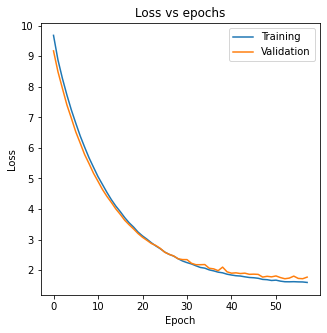

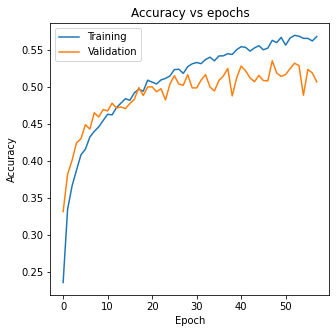

Time taken to train: 57.31697702407837 seconds


In [19]:
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
plot_learning_progress_loss(history2)
plot_learning_progress_accuracy(history2)
print("Time taken to train: %s seconds" % (end_time - start_time))

tf.Tensor(
[[790  15  28   7  15   6   5  36  63  35]
 [ 94 578  10  12   4   9   7  32  47 207]
 [166  17 440  57  83  42  27 117  26  25]
 [ 94  18 103 285  50 156  40 146  39  69]
 [118  11 231  44 326  24  35 180  18  13]
 [ 73   7 122 166  35 322  22 192  29  32]
 [ 49  20 163  87 125  31 405  71  19  30]
 [ 79   6  46  28  35  32   5 724   9  36]
 [255  54  11  13  11   9   0  25 560  62]
 [ 95 120  12  16   2   8   8  72  32 635]], shape=(10, 10), dtype=int32)

Classification Report

              precision    recall  f1-score   support

    airplane       0.44      0.79      0.56      1000
        auto       0.68      0.58      0.63      1000
        bird       0.38      0.44      0.41      1000
         cat       0.40      0.28      0.33      1000
        deer       0.48      0.33      0.39      1000
         dog       0.50      0.32      0.39      1000
        frog       0.73      0.41      0.52      1000
       horse       0.45      0.72      0.56      1000
        ship     

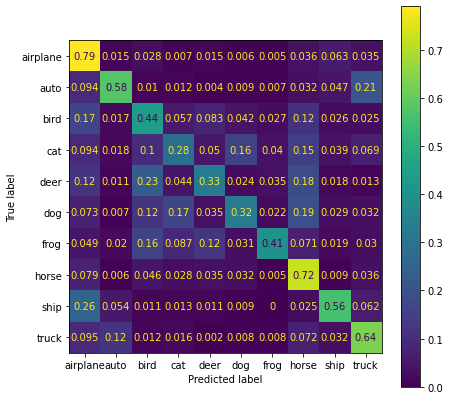

In [20]:
display_model_performance(model2,x_test,y_test,display_labels=cifar10_labels)

# **Model 3**
## Change in optimizer

We have used Adam optimizer with learning rate=0.0001. 
. Adam optimizer also uses beta_1=0.9 (exponential decay rate for the 1st moment estimates), beta_2=0.999 (exponential decay rate for the 2nd moment estimates).
We got our best accuracy with this model (55.5%) hovewer there was slight overfitting with training accuracy going upto 67%.

In [21]:
model3 = get_regularized_model1(0.002,0.5)

In [22]:
model3.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
start_time = time.time()
history3=model3.fit(x_train, y_train, batch_size=1024, epochs=100, validation_data=(x_test, y_test),callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])
end_time = time.time()

Epoch 1/100
49/49 [==============================] - 1s 20ms/step - loss: 9.6853 - accuracy: 0.2096 - val_loss: 9.1100 - val_accuracy: 0.3129
Epoch 2/100
49/49 [==============================] - 1s 16ms/step - loss: 8.7972 - accuracy: 0.3028 - val_loss: 8.3662 - val_accuracy: 0.3636
Epoch 3/100
49/49 [==============================] - 1s 17ms/step - loss: 8.1292 - accuracy: 0.3426 - val_loss: 7.7651 - val_accuracy: 0.3889
Epoch 4/100
49/49 [==============================] - 1s 16ms/step - loss: 7.5706 - accuracy: 0.3623 - val_loss: 7.2475 - val_accuracy: 0.4035
Epoch 5/100
49/49 [==============================] - 1s 16ms/step - loss: 7.0877 - accuracy: 0.3790 - val_loss: 6.7890 - val_accuracy: 0.4204
Epoch 6/100
49/49 [==============================] - 1s 16ms/step - loss: 6.6718 - accuracy: 0.3958 - val_loss: 6.4236 - val_accuracy: 0.4169
Epoch 7/100
49/49 [==============================] - 1s 16ms/step - loss: 6.3060 - accuracy: 0.4088 - val_loss: 6.0607 - val_accuracy: 0.4421
Epoch 

313/313 - 1s - loss: 1.9613 - accuracy: 0.5556

Test loss: 1.961271047592163

Test accuracy: 0.5555999875068665


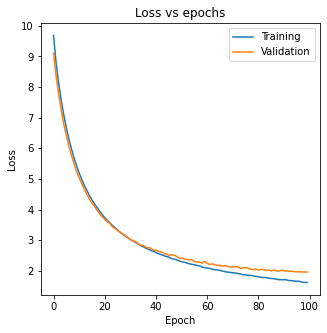

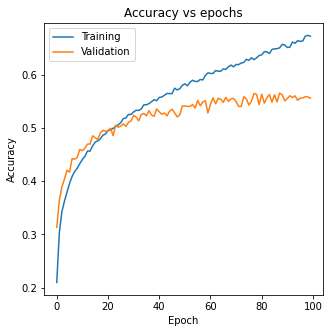

Time taken to train: 82.31442546844482 seconds


In [24]:
test_loss, test_acc = model3.evaluate(x_test,  y_test, verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
plot_learning_progress_loss(history3)
plot_learning_progress_accuracy(history3)
print("Time taken to train: %s seconds" % (end_time - start_time))

tf.Tensor(
[[552  28  63  19  95  14  14  53 114  48]
 [ 32 641  10  19  26  10  14  30  69 149]
 [ 54  13 339  65 258  87  58 101   8  17]
 [ 10  12  63 339 125 206  98 103  17  27]
 [ 21   5  76  35 629  38  66 110  13   7]
 [  5   5  50 165 121 447  51 123  18  15]
 [  5   6  38  66 178  36 606  37  10  18]
 [ 17   6  21  37 104  53   7 726   6  23]
 [ 87  57  13  29  59  12   6  14 673  50]
 [ 34 136   6  30  23  16  17  91  43 604]], shape=(10, 10), dtype=int32)

Classification Report

              precision    recall  f1-score   support

    airplane       0.68      0.55      0.61      1000
        auto       0.71      0.64      0.67      1000
        bird       0.50      0.34      0.40      1000
         cat       0.42      0.34      0.38      1000
        deer       0.39      0.63      0.48      1000
         dog       0.49      0.45      0.47      1000
        frog       0.65      0.61      0.63      1000
       horse       0.52      0.73      0.61      1000
        ship     

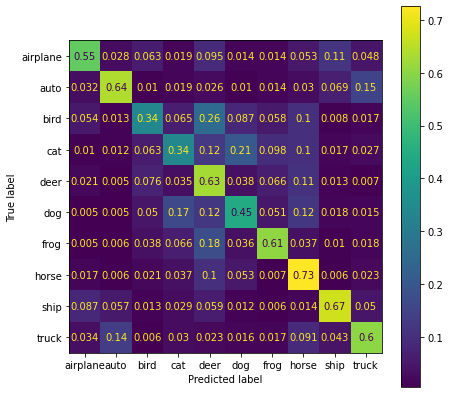

In [25]:
display_model_performance(model3,x_test,y_test,display_labels=cifar10_labels)

## 9. Comparison of models

### Between model#1 and model#2
We have mainly changed the batch size (reduced to 512). This resulted in faster learning (81 seconds for model1 vs 57 seconds for model 2). Accuracy had only a slight difference. However there were more fluctuations in accuracy over epochs with 512 batch size. This is expected since as we lower the batch size fluctuations in accuracy increases.

### Between model#1 and model#3 
We have changed optimizer between model 1 and 3. We have used Adam optimizer with learning rate=0.0001. 
We got our best accuracy with this model (55.5%) hovewer there was slight overfitting with training accuracy going upto 67%. Further there is scope for again tuning regularization and dropout parameters to close this gap. This was not done as part of this assignment due to lack of time.

### Comparison with state of art
* Using recent advanced learning techniques 99.37% accuracy has been achieved by Big Transfer (BiT): General Visual Representation Learning (Dec 2019).
(	Alexander Kolesnikov, Lucas Beyer, Xiaohua Zhai, Joan Puigcerver, Jessica Yung, Sylvain Gelly, Neil Houlsby)
(Source: https://benchmarks.ai/cifar-10)
* With CNN accuracy for CIFAR-10 started crossing 80% in early 2010 decade. 
(Source: https://benchmarks.ai/cifar-10)
* Without CNN people had acheived 70% accuracy. (source:https://openreview.net/pdf/1WvovwjA7UMnPB1oinBL.pdf)

-----------------------------------------------------------------------------------------------------------------------------The End---------------------------------------------------------------------------------------------